In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2023-04-14 17:00:01.302532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


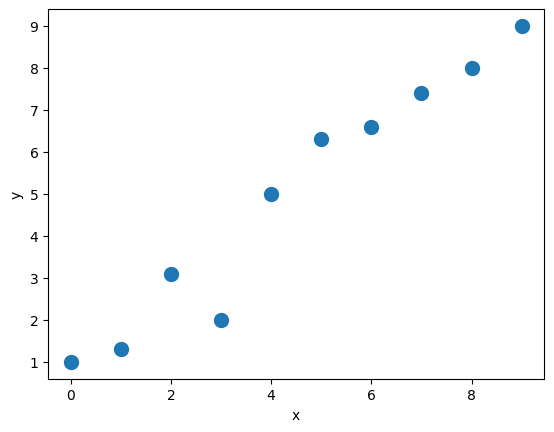

In [3]:
X_train = np.arange(10).reshape((10, 1)) # 10 data fitur 1 dimensi
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0]) # 10 data vector target 1 dimensi
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

2023-04-14 17:01:24.426552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 17:01:24.427175: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')
    def call(self, x):
        
        return self.w*x + self.b

In [6]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
## testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])
loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [8]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [9]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [10]:
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []
for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
            int(i/steps_per_epoch), i, loss_val))

Epoch    0 Step  0 Loss 43.5600
Epoch   10 Step 100 Loss 0.7530
Epoch   20 Step 200 Loss 20.1759
Epoch   30 Step 300 Loss 23.3976
Epoch   40 Step 400 Loss 6.3481
Epoch   50 Step 500 Loss 4.6356
Epoch   60 Step 600 Loss 0.2411
Epoch   70 Step 700 Loss 0.2036
Epoch   80 Step 800 Loss 3.8177
Epoch   90 Step 900 Loss 0.9416
Epoch  100 Step 1000 Loss 0.7035
Epoch  110 Step 1100 Loss 0.0348
Epoch  120 Step 1200 Loss 0.5404
Epoch  130 Step 1300 Loss 0.1170
Epoch  140 Step 1400 Loss 0.1195
Epoch  150 Step 1500 Loss 0.0944
Epoch  160 Step 1600 Loss 0.4670
Epoch  170 Step 1700 Loss 2.0695
Epoch  180 Step 1800 Loss 0.0020
Epoch  190 Step 1900 Loss 0.3612


Final Parameters: 2.6576622 4.8798566


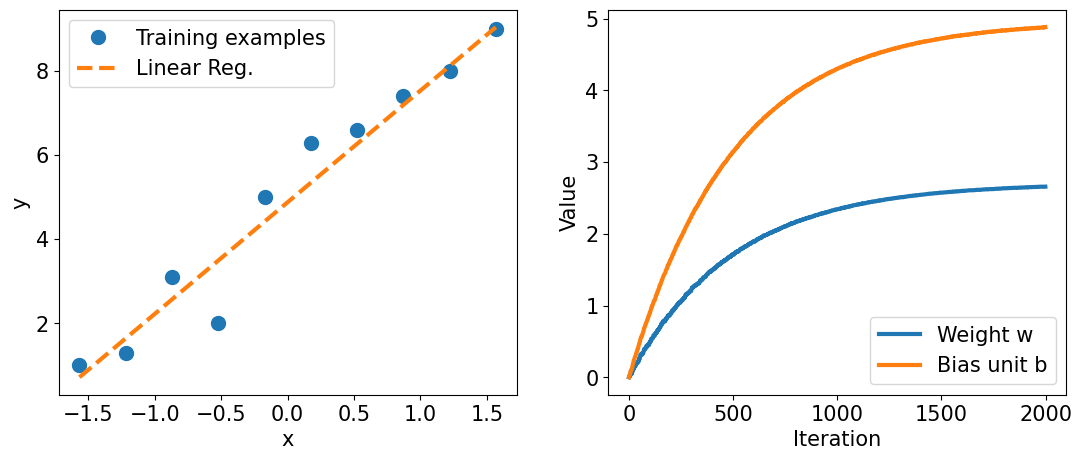

In [11]:
print('Final Parameters:', model.w.numpy(), model.b.numpy())
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig('ch13-linreg-1.pdf')
plt.show()

In [12]:
tf.random.set_seed(1)
model = MyModel()
#model.build((None, 1))
model.compile(optimizer='sgd',
            loss=loss_fn,
            metrics=['mae', 'mse'])

In [13]:
model.fit(X_train_norm, y_train,
        epochs=num_epochs, batch_size=batch_size,
        verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 856us/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 895us/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/10

10/10 [==============================] - 0s 873us/step - loss: 0.4139 - mae: 0.4887 - mse: 0.4139
Epoch 149/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4132 - mae: 0.4858 - mse: 0.4132
Epoch 150/200
10/10 [==============================] - 0s 985us/step - loss: 0.4140 - mae: 0.4936 - mse: 0.4140
Epoch 151/200
10/10 [==============================] - 0s 926us/step - loss: 0.4139 - mae: 0.4885 - mse: 0.4139
Epoch 152/200
10/10 [==============================] - 0s 881us/step - loss: 0.4139 - mae: 0.4876 - mse: 0.4139
Epoch 153/200
10/10 [==============================] - 0s 923us/step - loss: 0.4133 - mae: 0.4937 - mse: 0.4133
Epoch 154/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4140 - mae: 0.4925 - mse: 0.4140
Epoch 155/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4135 - mae: 0.4933 - mse: 0.4135
Epoch 156/200
10/10 [==============================] - 0s 984us/step - loss: 0.4139 - mae: 0.4902 - mse: 0.4139
Epoch 157/20

2.7067394 4.9657216


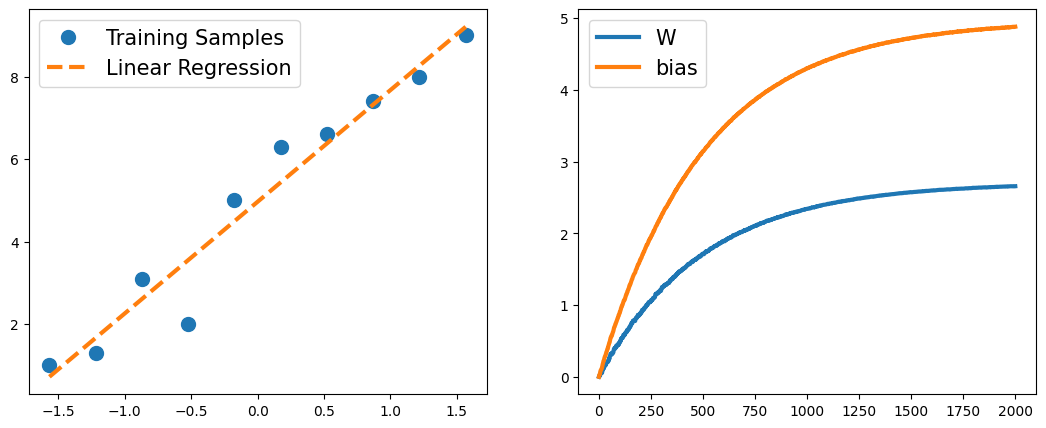

In [14]:
print(model.w.numpy(), model.b.numpy())
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Regression'], fontsize=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'bias'], fontsize=15)
plt.show()

In [16]:
import tensorflow_datasets as tfds
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

/home/fatjri/Downloads/Documents/envs/tensorflow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]/home/fatjri/Downloads/Documents/envs/tensorflow/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
Dl Completed...: 100%|██████████| 1/1 [00:03<00:00,  3.35s/ url]
Dl Size...: 0 MiB [00:03, ? MiB/s]
Dl Completed...: 100%|██████████| 1/1 [00:03<00:00,  3.36s/ url]


Shuffling...:   0%|          | 0/1 [00:00<?, ? shard/s]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`

Reading...: 0 examples [00:00, ? examples/s]
                                            
Writing...:   0%|          | 0/150 [00:00<?, ? examples/s]


Dataset iris downloaded and prepared to /home/fatjri/tensorflow_datasets/iris/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    version=1.0.0,
    description='This is perhaps the best known database to be found in the pattern recognition
literature. Fisher's paper is a classic in the field and is referenced
frequently to this day. (See Duda & Hart, for example.) The data set contains
3 classes of 50 instances each, where each class refers to a type of iris
plant. One class is linearly separable from the other 2; the latter are NOT
linearly separable from each other.
',
    urls=['https://archive.ics.uci.edu/ml/datasets/iris'],
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=150,
    splits={
        'train': 150,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
    author = "

In [17]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)
print(next(iter(ds_orig)))
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.5, 3.5, 1.3, 0.2], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}
